<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/keras)_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf

In [8]:
from tensorflow.keras.datasets import imdb

In [23]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]


In [24]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [25]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import Embedding

In [27]:
model = Sequential()

model.add(Embedding(1000, 32)) 
# 원핫인코딩은 길이100이었지만 워드임베딩벡터 길이는 32면 충분~ 인풋데이터 크기는 왜 안넣지?
model.add(SimpleRNN(8)) 
# 셀 개수도 8개로 팍 줄이자
model.add(Dense(1, activation='sigmoid')) 
# 이진분류이므로 유닛1개

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_seq, y_train, epochs=20, batch_size=32,
                    validation_data=(x_val_seq, y_val))

Epoch 1/20
625/625 [==============================] - 11s 18ms/step - loss: 0.5135 - accuracy: 0.7584 - val_loss: 0.4359 - val_accuracy: 0.8124
Epoch 2/20
625/625 [==============================] - 10s 17ms/step - loss: 0.3914 - accuracy: 0.8323 - val_loss: 0.4119 - val_accuracy: 0.8182
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.3439 - accuracy: 0.8562 - val_loss: 0.4057 - val_accuracy: 0.8136
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.3142 - accuracy: 0.8702 - val_loss: 0.4047 - val_accuracy: 0.8218
Epoch 5/20
625/625 [==============================] - 10s 17ms/step - loss: 0.2910 - accuracy: 0.8812 - val_loss: 0.4288 - val_accuracy: 0.8268
Epoch 6/20
625/625 [==============================] - 10s 17ms/step - loss: 0.2642 - accuracy: 0.8939 - val_loss: 0.4764 - val_accuracy: 0.7772
Epoch 7/20
625/625 [==============================] - 10s 17ms/step - loss: 0.2494 - accuracy: 0.9025 - val_loss: 0.4761 - val_accuracy:

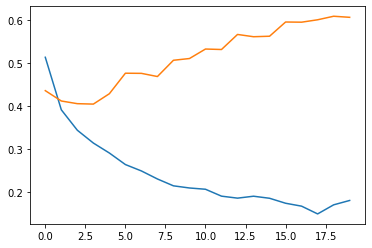

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [31]:
_, accuracy = model.evaluate(x_val_seq, y_val, verbose=0)
accuracy
# 헉 epoch3부터 바로 오버피팅인듯. 엄청 빠르다잉

0.8059999942779541